In [56]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from scipy.stats import norm
from scipy.optimize import curve_fit
from vice.toolkit.hydrodisk import hydrodiskstars
sys.path.append(os.path.abspath('../src/scripts'))
from _globals import ZONE_WIDTH, END_TIME
from utils import get_color_list, box_smooth

In [2]:
# Plot settings
plt.rcParams.update({
    'xtick.direction': 'in',
    'xtick.top': True,
    'ytick.direction': 'in',
    'ytick.right': True,
    'figure.dpi': 140,
    'figure.figsize': (5, 3),
})

In [3]:
radial_bins = np.arange(0, 20.1, ZONE_WIDTH)
h277 = hydrodiskstars(radial_bins, N=3102519)
# Select disk stars only
h277.decomp_filter([1, 2])

In [4]:
data = pd.DataFrame(dict(h277.analog_data))
data.set_index('id', inplace=True)
data['age'] = END_TIME - data['tform']
data = data[data['age'] >= 0].copy()
data['deltar'] = data['rfinal'] - data['rform']
data

,tform,rform,rfinal,zform,zfinal,vrad,vphi,vz,decomp,age,deltar
id,,,,,,,,,,,
26926205,0.0459,0.1672,2.4490,0.0062,0.3662,-109.3634,246.6459,-90.0696,2,13.1541,2.2818
26926206,0.0459,0.0512,9.3860,0.0781,-0.0020,-56.4354,118.6627,-64.6081,2,13.1541,9.3348
26926234,0.0459,2.5153,2.6517,0.0759,1.7268,111.6952,182.2087,87.8626,2,13.1541,0.1364
26926675,0.0535,0.1807,2.6276,0.0210,0.4179,7.9227,254.7566,-68.0811,1,13.1465,2.4469
26927985,0.0778,2.6869,2.6593,0.0038,2.0998,158.9895,124.0544,-92.2021,2,13.1222,-0.0276
...,...,...,...,...,...,...,...,...,...,...,...
35026854,13.1995,0.6881,0.6881,0.0251,0.0251,104.1179,193.9241,4.8358,1,0.0005,0.0000
35026894,13.1995,6.3849,6.3849,-0.0262,-0.0262,5.8511,208.4339,0.0003,1,0.0005,0.0000
35026923,13.1995,7.5562,7.5562,-0.0938,-0.0938,-20.9653,224.9336,-3.5471,1,0.0005,0.0000


In [5]:
data[data['deltar'] == 0.]

,tform,rform,rfinal,zform,zfinal,vrad,vphi,vz,decomp,age,deltar
id,,,,,,,,,,,
32096042,5.2186,0.5646,0.5646,-0.0445,-0.0297,-111.8875,228.0260,-58.7484,1,7.9814,0.0
34008756,9.0838,0.4424,0.4424,-0.0156,0.0422,-154.4986,186.3175,-16.8128,1,4.1162,0.0
34675581,11.7229,5.8703,5.8703,0.1325,0.0966,29.3398,232.5490,7.6840,1,1.4771,0.0
34828390,12.3720,0.7843,0.7843,-0.0298,0.0297,-90.9877,206.0992,-8.1546,1,0.8280,0.0
34997692,13.0822,5.7899,5.7899,0.1423,0.1423,14.9405,222.3976,-0.1122,1,0.1178,0.0
...,...,...,...,...,...,...,...,...,...,...,...
35026854,13.1995,0.6881,0.6881,0.0251,0.0251,104.1179,193.9241,4.8358,1,0.0005,0.0
35026894,13.1995,6.3849,6.3849,-0.0262,-0.0262,5.8511,208.4339,0.0003,1,0.0005,0.0
35026923,13.1995,7.5562,7.5562,-0.0938,-0.0938,-20.9653,224.9336,-3.5471,1,0.0005,0.0


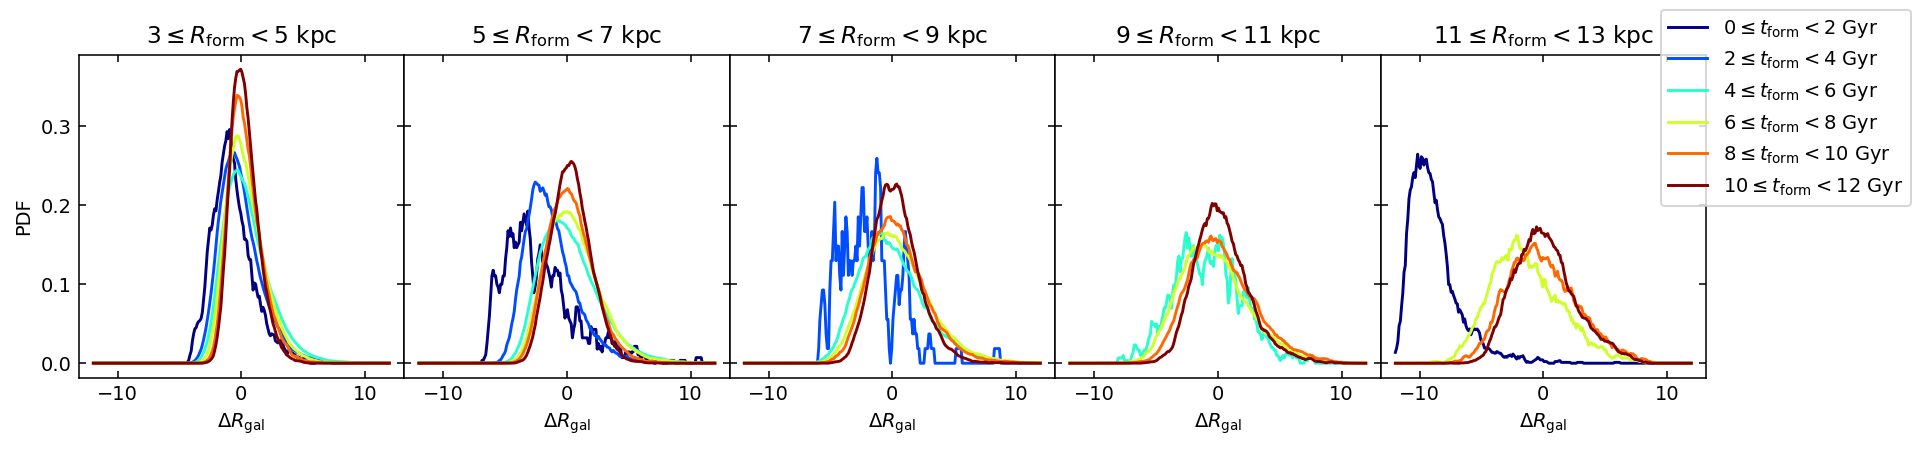

In [6]:
rform_bins = np.arange(3, 15, 2, dtype='float')
tform_bins = np.arange(0, 14, 2, dtype='float')

# pick discrete colors
cmap = plt.get_cmap('jet')
colors = get_color_list(cmap, tform_bins)

deltar_bins = np.arange(-12, 12.1, 0.1)

fig, axs = plt.subplots(1, 5, figsize=(15, 3), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.)

for i, ax in enumerate(axs):
    rform_lim = tuple(rform_bins[i:i+2])
    ax.set_title(r'$%d\leq R_{\rm{form}} < %d$ kpc' % rform_lim)
    ax.set_xlabel(r'$\Delta R_{\rm{gal}}$')
    for j, color in enumerate(colors):
        tform_lim = tuple(tform_bins[j:j+2])
        subset = data[(data['rform'] >= rform_lim[0]) &
                      (data['rform'] <  rform_lim[1]) &
                      (data['tform'] >= tform_lim[0]) &
                      (data['tform'] <  tform_lim[1])]
        if subset.shape[0] > 100:
            hist, _ = np.histogram(subset['deltar'], deltar_bins, density=True)
            hist = box_smooth(hist, deltar_bins, 0.5)
            bin_centers = (deltar_bins[:-1] + deltar_bins[1:]) / 2
            if i == 0:
                label = r'$%d\leq t_{\rm{form}} < %d$ Gyr' % tform_lim
            else:
                label = None
            ax.plot(bin_centers, hist, c=color, ls='-', label=label)

axs[0].set_ylabel('PDF')
fig.legend()
plt.show()

### Frankel et al. (2018) prescription

In [44]:
def migration_scale(age, efficiency=3.6):
    r"""
    Standard deviation of the Gaussian migration scheme from Frankel et al. (2018).
    
    The probability of a star born at a given time migrating by a certain distance 
    by now is a Gaussian centered on 0 with a scale length given by this function.
    
    Parameters
    ----------
    age : float
        Age of star particle in Gyr.
    efficiency : float, optional
        Global radial orbit migration efficiency parameter $\sigma_{\rm{RMS}}$ in
        Frankel et al. (2018), measured in kpc. The default is 3.6.
    
    Returns
    -------
    float
        Radial migration scale in kpc.
    """
    return efficiency * (age / 8) ** 0.5

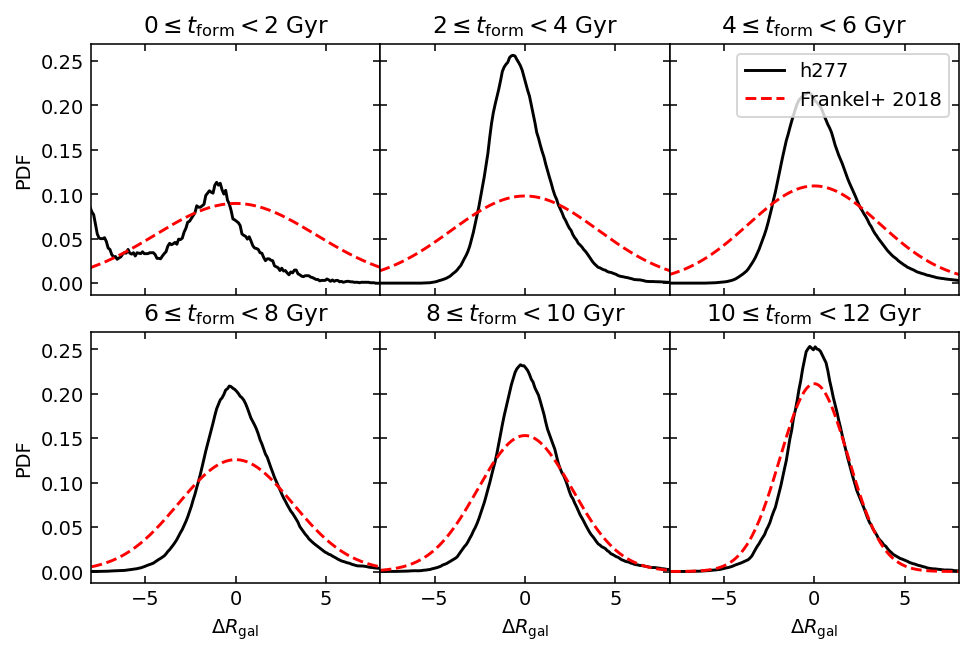

In [41]:
tform_bins = np.arange(0, 14, 2, dtype='float')

deltar_bins = np.arange(-20, 20.1, 0.1)

fig, axs = plt.subplots(2, 3, figsize=(8, 5), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0., hspace=0.15)

for i, ax in enumerate(axs.flatten()):
    tform_lim = tuple(tform_bins[i:i+2])
    subset = data[(data['rform'] >= 3) &
                  (data['rform'] <  15) &
                  (data['tform'] >= tform_lim[0]) &
                  (data['tform'] <  tform_lim[1])]
    # if subset.shape[0] > 100:
    hist, _ = np.histogram(subset['deltar'], deltar_bins, density=True)
    hist = box_smooth(hist, deltar_bins, 0.5)
    bin_centers = (deltar_bins[:-1] + deltar_bins[1:]) / 2
    ax.plot(bin_centers, hist, c='k', ls='-', label='h277')
    # model gaussian
    age = END_TIME - (tform_lim[0] + tform_lim[1]) / 2
    ax.plot(bin_centers, norm.pdf(bin_centers, 0,  migration_scale(age)), 
            c='r', ls='--', label='Frankel+ 2018')
    # rscale = ((rform_lim[0] + rform_lim[1]) / 2) / 4
    # ax.plot(bin_centers, norm.pdf(bin_centers, 0,  migration_scale(age) * rscale), 
    #         c='b', ls=':', label='age + rform')
    ax.set_title(r'$%d\leq t_{\rm{form}} < %d$ Gyr' % tform_lim)

for ax in axs[-1,:]:
    ax.set_xlabel(r'$\Delta R_{\rm{gal}}$')
for ax in axs[:,0]:
    ax.set_ylabel('PDF')
axs[0,-1].legend()
axs[0,0].set_xlim((-8, 8))

plt.show()

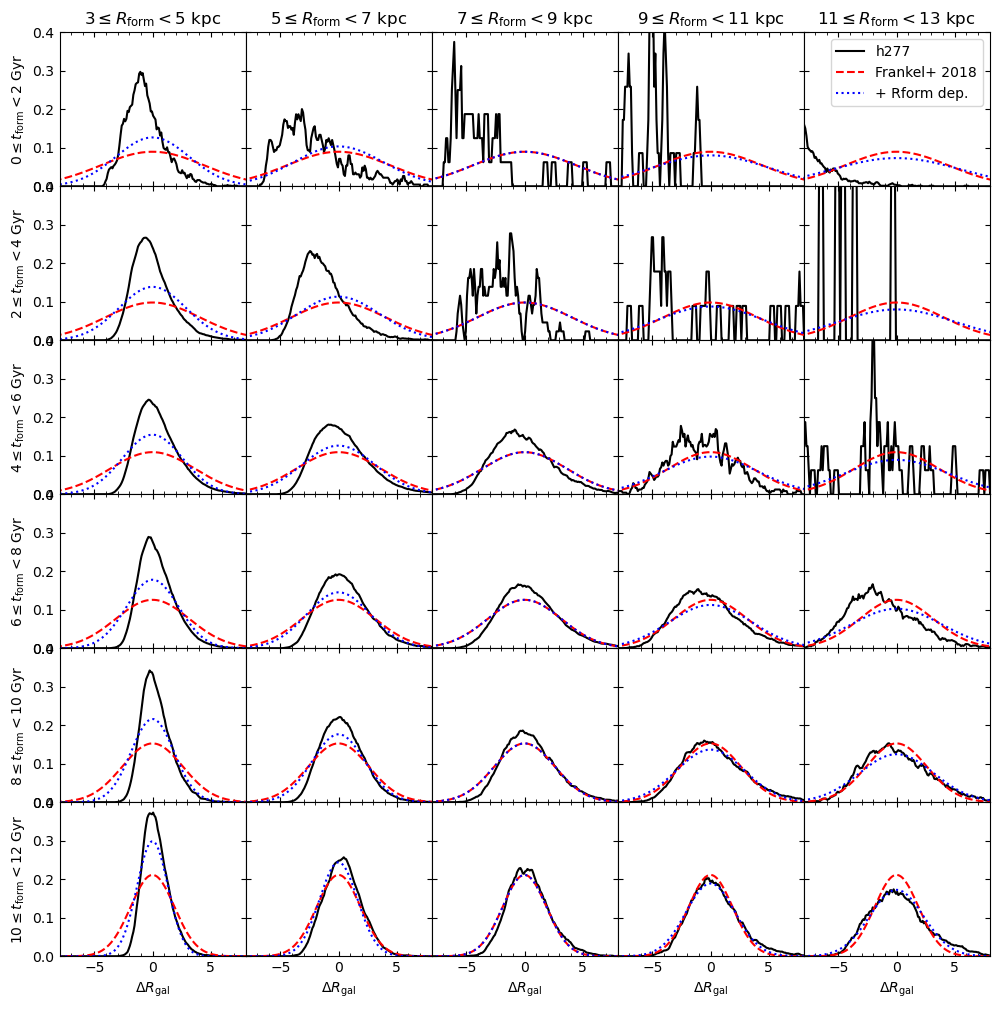

In [57]:
rform_bins = np.arange(3, 15, 2, dtype='float')
tform_bins = np.arange(0, 14, 2, dtype='float')

deltar_bins = np.arange(-20, 20.1, 0.1)

fig, axs = plt.subplots(6, 5, figsize=(12, 12), sharex=True, sharey=True, dpi=100)
plt.subplots_adjust(wspace=0., hspace=0.)

# rscale = lambda r: 3.6 * (r / 4) ** 1/2

for i, row in enumerate(axs):
    tform_lim = tuple(tform_bins[i:i+2])
    for j, ax in enumerate(row):
        rform_lim = tuple(rform_bins[j:j+2])
        subset = data[(data['rform'] >= rform_lim[0]) &
                      (data['rform'] <  rform_lim[1]) &
                      (data['tform'] >= tform_lim[0]) &
                      (data['tform'] <  tform_lim[1])]
        # if subset.shape[0] > 100:
        hist, _ = np.histogram(subset['deltar'], deltar_bins, density=True)
        hist = box_smooth(hist, deltar_bins, 0.5)
        bin_centers = (deltar_bins[:-1] + deltar_bins[1:]) / 2
        ax.plot(bin_centers, hist, c='k', ls='-', label='h277')
        # model gaussian
        age = END_TIME - (tform_lim[0] + tform_lim[1]) / 2
        ax.plot(bin_centers, norm.pdf(bin_centers, 0,  migration_scale(age)), 
                c='r', ls='--', label='Frankel+ 2018')
        rscale = (((rform_lim[0] + rform_lim[1]) / 2) / 8) ** 0.5
        ax.plot(bin_centers, norm.pdf(bin_centers, 0,  migration_scale(age) * rscale), 
                c='b', ls=':', label='+ Rform dep.')
        if i == 0:
            ax.set_title(r'$%d\leq R_{\rm{form}} < %d$ kpc' % rform_lim)
        if j == 0:
            ax.set_ylabel(r'$%d\leq t_{\rm{form}} < %d$ Gyr' % tform_lim)

for ax in axs[-1,:]:
    ax.set_xlabel(r'$\Delta R_{\rm{gal}}$')
axs[0,-1].legend()
axs[0,0].set_xlim((-8, 8))
axs[0,0].set_ylim((0, 0.4))
axs[0,0].xaxis.set_minor_locator(MultipleLocator(1))

plt.show()

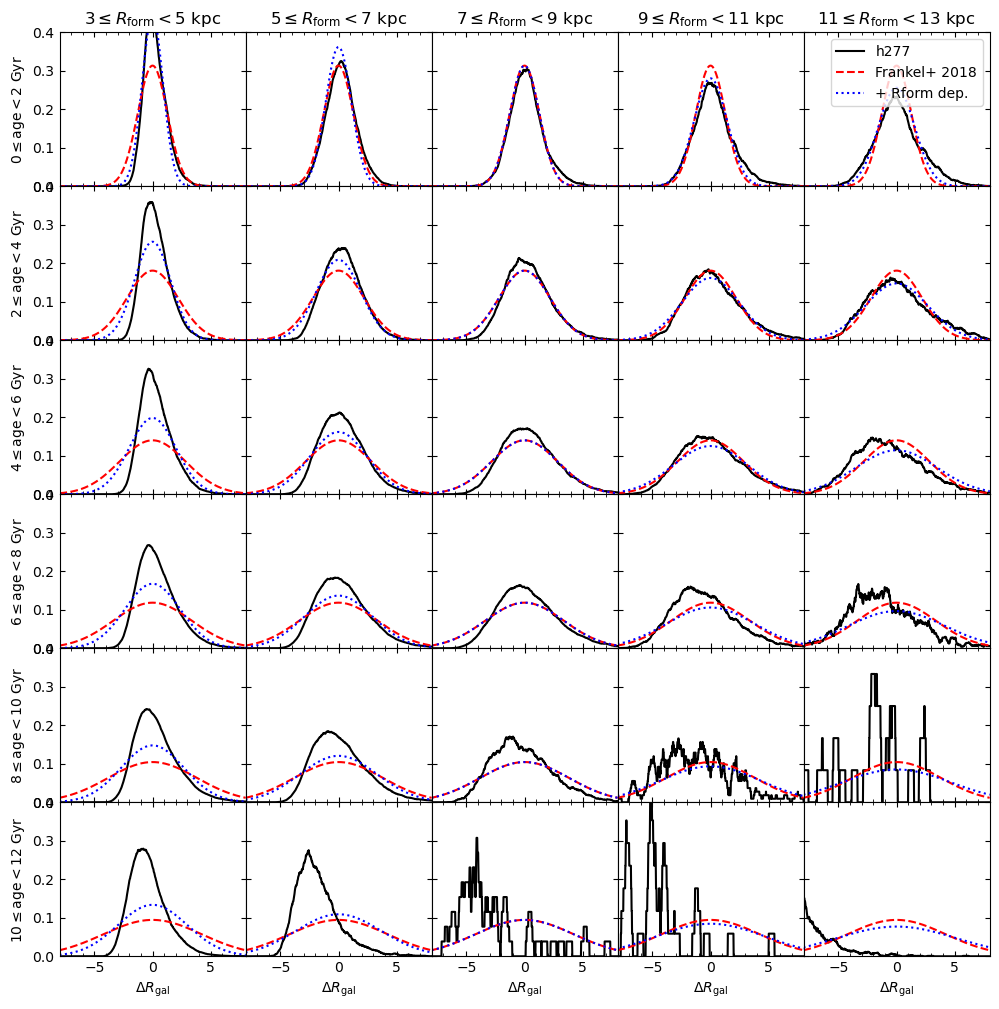

In [68]:
rform_bins = np.arange(3, 15, 2, dtype='float')
age_bins = np.arange(0, 14, 2, dtype='float')

deltar_bins = np.arange(-20, 20.1, 0.02)

fig, axs = plt.subplots(6, 5, figsize=(12, 12), sharex=True, sharey=True, dpi=100)
plt.subplots_adjust(wspace=0., hspace=0.)

# rscale = lambda r: 3.6 * (r / 4) ** 1/2

for i, row in enumerate(axs):
    age_lim = tuple(age_bins[i:i+2])
    for j, ax in enumerate(row):
        rform_lim = tuple(rform_bins[j:j+2])
        subset = data[(data['rform'] >= rform_lim[0]) &
                      (data['rform'] <  rform_lim[1]) &
                      (data['age'] >= age_lim[0]) &
                      (data['age'] <  age_lim[1]) & 
                      (data['deltar'] != 0.)             # cut stars w/ exactly 0 migration
                     ]
        # if subset.shape[0] > 100:
        hist, _ = np.histogram(subset['deltar'], deltar_bins, density=True)
        hist = box_smooth(hist, deltar_bins, 0.5)
        bin_centers = (deltar_bins[:-1] + deltar_bins[1:]) / 2
        ax.plot(bin_centers, hist, c='k', ls='-', label='h277')
        # model gaussian
        # age = END_TIME - (tform_lim[0] + tform_lim[1]) / 2
        age = (age_lim[0] + age_lim[1]) / 2
        ax.plot(bin_centers, norm.pdf(bin_centers, 0,  migration_scale(age)), 
                c='r', ls='--', label='Frankel+ 2018')
        rscale = (((rform_lim[0] + rform_lim[1]) / 2) / 8) ** 0.5
        ax.plot(bin_centers, norm.pdf(bin_centers, 0,  migration_scale(age) * rscale), 
                c='b', ls=':', label='+ Rform dep.')
        if i == 0:
            ax.set_title(r'$%d\leq R_{\rm{form}} < %d$ kpc' % rform_lim)
        if j == 0:
            ax.set_ylabel(r'$%d\leq \rm{age} < %d$ Gyr' % age_lim)

for ax in axs[-1,:]:
    ax.set_xlabel(r'$\Delta R_{\rm{gal}}$')
axs[0,-1].legend()
axs[0,0].set_xlim((-8, 8))
axs[0,0].set_ylim((0, 0.4))
axs[0,0].xaxis.set_minor_locator(MultipleLocator(1))

plt.show()

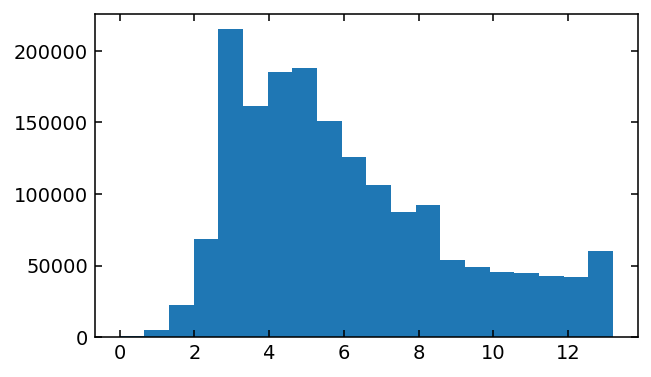

In [12]:
plt.hist(data['tform'], bins=20)
plt.show()

### Gaussian fits

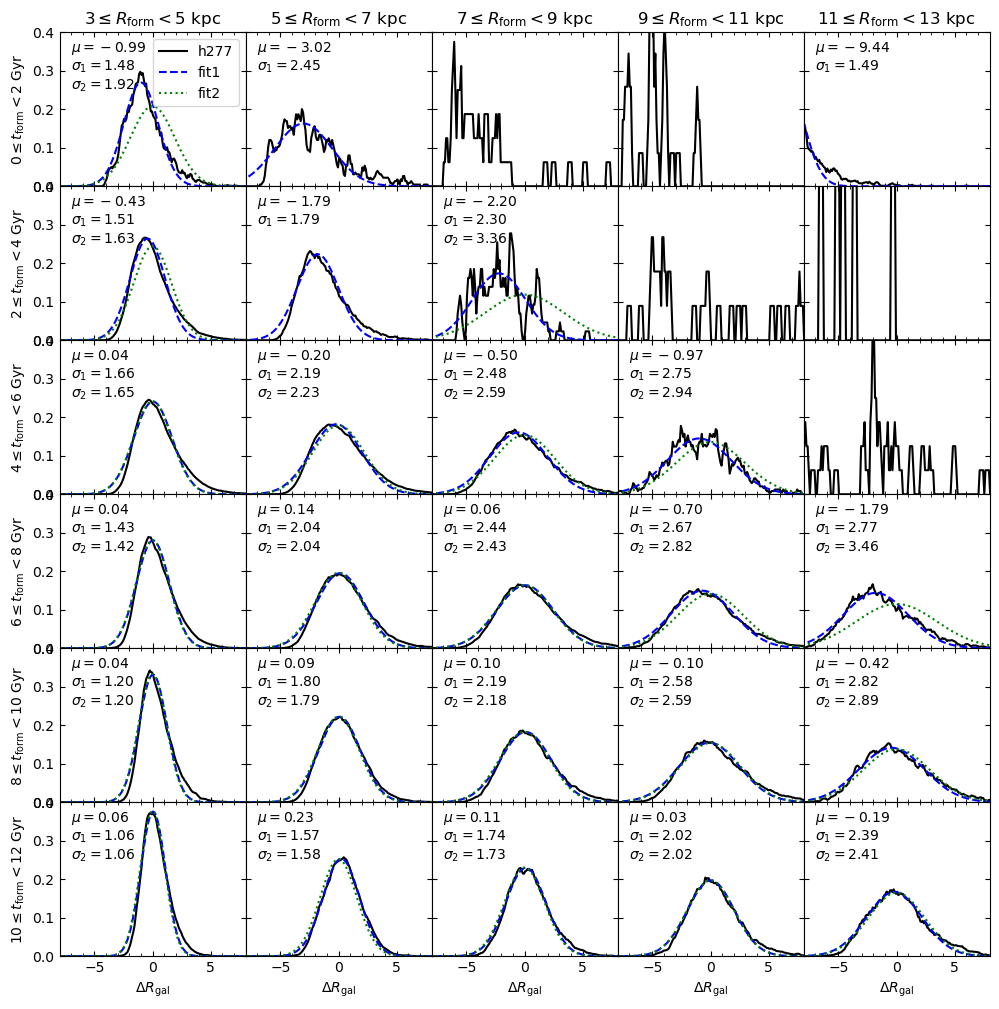

In [85]:
rform_bins = np.arange(3, 15, 2, dtype='float')
tform_bins = np.arange(0, 14, 2, dtype='float')

deltar_bins = np.arange(-20, 20.1, 0.1)

fig, axs = plt.subplots(6, 5, figsize=(12, 12), sharex=True, sharey=True, dpi=100)
plt.subplots_adjust(wspace=0., hspace=0.)

# rscale = lambda r: 3.6 * (r / 4) ** 1/2

for i, row in enumerate(axs):
    tform_lim = tuple(tform_bins[i:i+2])
    for j, ax in enumerate(row):
        rform_lim = tuple(rform_bins[j:j+2])
        subset = data[(data['rform'] >= rform_lim[0]) &
                      (data['rform'] <  rform_lim[1]) &
                      (data['tform'] >= tform_lim[0]) &
                      (data['tform'] <  tform_lim[1])]
        # if subset.shape[0] > 100:
        hist, _ = np.histogram(subset['deltar'], deltar_bins, density=True)
        hist_smooth = box_smooth(hist, deltar_bins, 0.5)
        bin_centers = (deltar_bins[:-1] + deltar_bins[1:]) / 2
        ax.plot(bin_centers, hist_smooth, c='k', ls='-', label='h277')
        # model gaussian
        if subset.shape[0] > 100:
            popt1, pcov1 = curve_fit(norm.pdf, bin_centers, hist, p0=(0, 3.6))
            ax.plot(bin_centers, norm.pdf(bin_centers, *popt1), 'b--', label='fit1')
            ax.text(-7, 0.35, r'$\mu=%.02f$' % popt1[0])
            ax.text(-7, 0.3, r'$\sigma_1=%.02f$' % popt1[1])
            # if mean is < 1 sigma away from 0, fit again with center fixed at 0
            if np.abs(popt1[0]) < popt1[1]:
                norm_centered = lambda x, sig: norm.pdf(x, 0., sig)
                popt2, pcov2 = curve_fit(norm_centered, bin_centers, hist, p0=(3.6))
                ax.plot(bin_centers, norm_centered(bin_centers, *popt2), 'g:', label='fit2')
                ax.text(-7, 0.25, r'$\sigma_2=%.02f$' % popt2[0])
        if i == 0:
            ax.set_title(r'$%d\leq R_{\rm{form}} < %d$ kpc' % rform_lim)
        if j == 0:
            ax.set_ylabel(r'$%d\leq t_{\rm{form}} < %d$ Gyr' % tform_lim)

for ax in axs[-1,:]:
    ax.set_xlabel(r'$\Delta R_{\rm{gal}}$')
axs[0,0].legend(loc='upper right')
axs[0,0].set_xlim((-8, 8))
axs[0,0].set_ylim((0, 0.4))
axs[0,0].xaxis.set_minor_locator(MultipleLocator(1))

plt.show()

In [125]:
def plaw(x, coeff, slope):
    return coeff * x ** slope

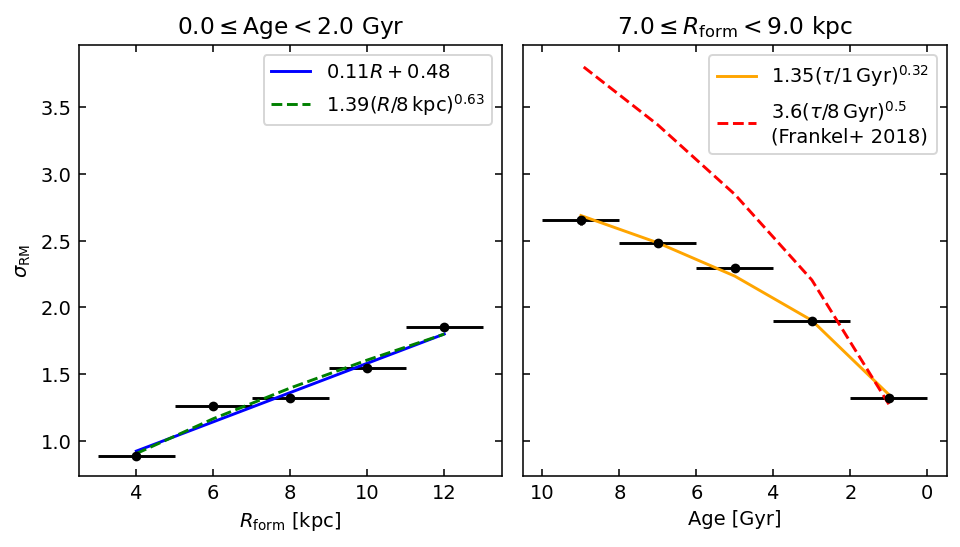

In [153]:
deltar_bins = np.arange(-20, 20.1, 0.1)

fig, axs = plt.subplots(1, 2, figsize=(8, 4), sharey=True)
plt.subplots_adjust(wspace=0.05)

# fixed tform, varying rform
sigmas = []
errors = []
age_lim = (0, 2)
rform_bins = np.arange(3, 15, 2, dtype='float')
for j in range(rform_bins.shape[0] - 1):
    rform_lim = tuple(rform_bins[j:j+2])
    subset = data[(data['rform'] >= rform_lim[0]) &
                  (data['rform'] <  rform_lim[1]) &
                  (data['age'] >= age_lim[0]) &
                  (data['age'] <  age_lim[1]) & 
                  (data['deltar'] != 0.)]
    hist, _ = np.histogram(subset['deltar'], deltar_bins, density=True)
    # hist_smooth = box_smooth(hist, deltar_bins, 0.5)
    bin_centers = (deltar_bins[:-1] + deltar_bins[1:]) / 2
    # model gaussian
    norm_centered = lambda x, sig: norm.pdf(x, 0., sig)
    popt, pcov = curve_fit(norm_centered, bin_centers, hist, p0=(3.6))
    sigmas.append(popt[0])
    errors.append(np.sqrt(np.diag(pcov))[0])

rform_arr = (rform_bins[:-1] + rform_bins[1:]) / 2
axs[0].errorbar(rform_arr, sigmas, xerr=1, yerr=errors, 
                linestyle='none', c='k', marker='o', markersize=4)
# linear fit
linfit = np.polyfit(rform_arr, sigmas, 1, w=1/np.array(errors))
axs[0].plot(rform_arr, np.poly1d(linfit)(rform_arr), 'b-', 
            label=r'$%.02f R+%.02f$' % tuple(linfit))
# plaw fit
popt, pcov = curve_fit(plaw, rform_arr/8, np.array(sigmas))
axs[0].plot(rform_arr, plaw(rform_arr/8, *popt), 'g--', 
            label=r'$%.02f (R/8\,\rm{kpc})^{%.02f}$' % tuple(popt))
axs[0].set_xlabel(r'$R_{\rm{form}}$ [kpc]')
axs[0].set_ylabel(r'$\sigma_{\rm{RM}}$')
axs[0].set_title(r'$%.1f \leq \rm{Age} < %.1f$ Gyr' % age_lim)
axs[0].legend()

# fixed rform, varying tform
sigmas = []
errors = []
rform_lim = (7, 9)
# tform_bins = np.arange(3.2, 15.2, 2, dtype='float')
age_bins = np.arange(0, 12, 2, dtype='float')
for i in range(tform_bins.shape[0] - 1):
    # tform_lim = tuple(tform_bins[i:i+2])
    age_lim = tuple(age_bins[i:i+2])
    subset = data[(data['rform'] >= rform_lim[0]) &
                  (data['rform'] <  rform_lim[1]) &
                  (data['age'] >= age_lim[0]) &
                  (data['age'] <  age_lim[1]) & 
                  (data['deltar'] != 0.)]
    hist, _ = np.histogram(subset['deltar'], deltar_bins, density=True)
    # hist_smooth = box_smooth(hist, deltar_bins, 0.5)
    bin_centers = (deltar_bins[:-1] + deltar_bins[1:]) / 2
    # model gaussian
    norm_centered = lambda x, sig: norm.pdf(x, 0., sig)
    popt, pcov = curve_fit(norm_centered, bin_centers, hist, p0=(3.6))
    sigmas.append(popt[0])
    errors.append(np.sqrt(np.diag(pcov))[0])

# tform_arr = (tform_bins[:-1] + tform_bins[1:]) / 2
age_arr = (age_bins[:-1] + age_bins[1:]) / 2
axs[1].errorbar(age_arr, sigmas, xerr=1, yerr=errors, 
                linestyle='none', c='k', marker='o', markersize=4)
# Plot plaw fit
popt, pcov = curve_fit(plaw, age_arr, np.array(sigmas))
axs[1].plot(age_arr, plaw(age_arr, *popt), color='orange', linestyle='-', 
            label=r'$%.02f (\tau/1\,\rm{Gyr})^{%.02f}$' % tuple(popt))
# Plot Frankel+ 2018
axs[1].plot(age_arr, migration_scale(age_arr), 'r--', 
            label=r'$3.6 (\tau/8\,\rm{Gyr})^{0.5}$' + '\n(Frankel+ 2018)')
axs[1].set_xlabel('Age [Gyr]')
axs[1].invert_xaxis()
axs[1].xaxis.set_major_locator(MultipleLocator(2))
axs[1].set_title(r'$%.1f \leq R_{\rm{form}} < %.1f$ kpc' % rform_lim)
axs[1].legend()

plt.show()

In [154]:
def new_migration_scale(age, rform, coeff=1.4):
    return coeff * (age ** 0.32) * (rform / 8) ** 0.63

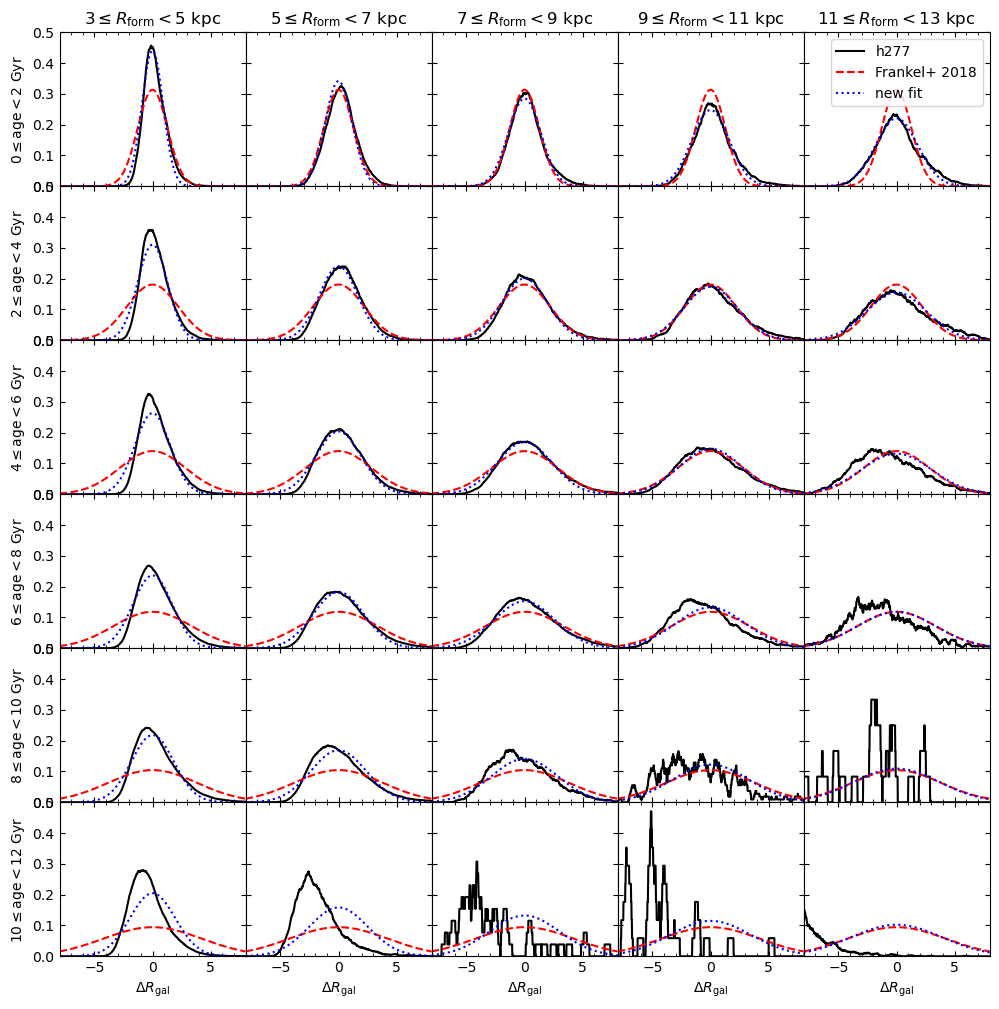

In [159]:
rform_bins = np.arange(3, 15, 2, dtype='float')
age_bins = np.arange(0, 14, 2, dtype='float')

deltar_bins = np.arange(-20, 20.1, 0.02)

fig, axs = plt.subplots(6, 5, figsize=(12, 12), sharex=True, sharey=True, dpi=100)
plt.subplots_adjust(wspace=0., hspace=0.)

# rscale = lambda r: 3.6 * (r / 4) ** 1/2

for i, row in enumerate(axs):
    age_lim = tuple(age_bins[i:i+2])
    for j, ax in enumerate(row):
        rform_lim = tuple(rform_bins[j:j+2])
        subset = data[(data['rform'] >= rform_lim[0]) &
                      (data['rform'] <  rform_lim[1]) &
                      (data['age'] >= age_lim[0]) &
                      (data['age'] <  age_lim[1]) & 
                      (data['deltar'] != 0.)             # cut stars w/ exactly 0 migration
                     ]
        # if subset.shape[0] > 100:
        hist, _ = np.histogram(subset['deltar'], deltar_bins, density=True)
        hist = box_smooth(hist, deltar_bins, 0.5)
        bin_centers = (deltar_bins[:-1] + deltar_bins[1:]) / 2
        ax.plot(bin_centers, hist, c='k', ls='-', label='h277')
        # model gaussian
        # age = END_TIME - (tform_lim[0] + tform_lim[1]) / 2
        age = (age_lim[0] + age_lim[1]) / 2
        rform = (rform_lim[0] + rform_lim[1]) / 2
        ax.plot(bin_centers, norm.pdf(bin_centers, 0,  migration_scale(age)), 
                c='r', ls='--', label='Frankel+ 2018')
        ax.plot(bin_centers, norm.pdf(bin_centers, 0,  new_migration_scale(age, rform)), 
                c='b', ls=':', label='new fit')
        if i == 0:
            ax.set_title(r'$%d\leq R_{\rm{form}} < %d$ kpc' % rform_lim)
        if j == 0:
            ax.set_ylabel(r'$%d\leq \rm{age} < %d$ Gyr' % age_lim)

for ax in axs[-1,:]:
    ax.set_xlabel(r'$\Delta R_{\rm{gal}}$')
axs[0,-1].legend()
axs[0,0].set_xlim((-8, 8))
axs[0,0].set_ylim((0, 0.5))
axs[0,0].xaxis.set_minor_locator(MultipleLocator(1))

plt.show()

## Midplane distance

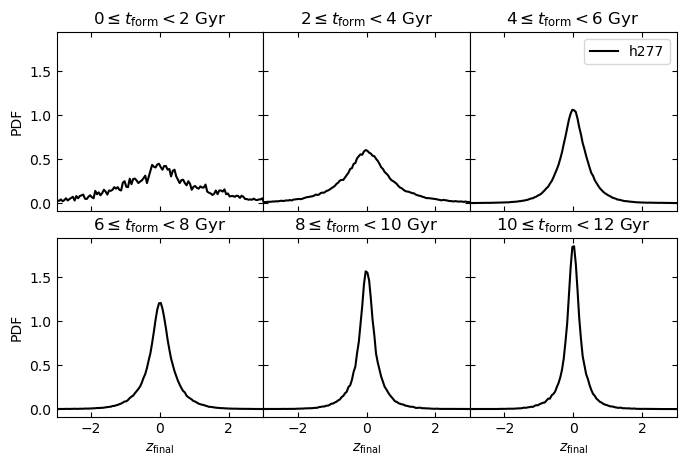

In [35]:
tform_bins = np.arange(0, 14, 2, dtype='float')

deltar_bins = np.arange(-5, 5.05, 0.05)

fig, axs = plt.subplots(2, 3, figsize=(8, 5), sharex=True, sharey=True, dpi=100)
plt.subplots_adjust(wspace=0., hspace=0.15)

for i, ax in enumerate(axs.flatten()):
    tform_lim = tuple(tform_bins[i:i+2])
    subset = data[(data['rform'] >= 3) &
                  (data['rform'] <  15) &
                  (data['tform'] >= tform_lim[0]) &
                  (data['tform'] <  tform_lim[1])]
    # if subset.shape[0] > 100:
    hist, _ = np.histogram(subset['zfinal'], deltar_bins, density=True)
    # hist = box_smooth(hist, deltar_bins, 0.5)
    bin_centers = (deltar_bins[:-1] + deltar_bins[1:]) / 2
    ax.plot(bin_centers, hist, c='k', ls='-', label='h277')
    ax.set_title(r'$%d\leq t_{\rm{form}} < %d$ Gyr' % tform_lim)

for ax in axs[-1,:]:
    ax.set_xlabel(r'$z_{\rm{final}}$')
for ax in axs[:,0]:
    ax.set_ylabel('PDF')
axs[0,-1].legend()
axs[0,0].set_xlim((-3, 3))

plt.show()